# Purpose
- goal is to use DLC-estimated key points and define behavioral epochs
- data is from Alex F from Knowles lab, and we want to quanitfy:

1. time in light box (time visible)
    - nose only
    - nose and ears
    - nose and ears and butt
2. distance to edge IN REAL COORDINATES
    - adjust marked coordinates to real coordinates (50cm2 box)
    - get animal position relative to corners
3. #, timing, location of rearing events
4. #, timing, location of jumps


In [1]:
# imports
import numpy as np
import pandas as pd
import glob, os, csv
import matplotlib.pyplot as plt

In [2]:
# load an example file
filename = "/Users/dennise/Downloads/5DLC_resnet50_2022_Knowles_AlexOct13shuffle1_500000.csv"
#filename = "/home/dennislab2/Desktop/videos/skok_alex_videos/5DLC_resnet50_2022_Knowles_AlexOct13shuffle1_500000.csv"
df = pd.read_csv(filename,header=[1,2])
df

bodyparts      box_tl                              box_tr              \
         coords           x           y likelihood            x           y   
0             0  600.575623  141.166534   0.999926  1417.813110  146.198654   
1             1  600.653870  141.739182   0.999920  1417.510376  145.888626   
2             2  601.028015  141.864044   0.999900  1417.739380  145.986465   
3             3  600.710266  141.865433   0.999923  1417.394287  146.227692   
4             4  601.733398  142.436890   0.999883  1417.477783  146.626511   
...         ...         ...         ...        ...          ...         ...   
17969     17969  698.581726  189.737732   0.999886  1519.398804  178.036163   
17970     17970  698.699707  189.688950   0.999876  1519.541138  178.037872   
17971     17971  698.651367  189.868378   0.999853  1519.545654  178.007477   
17972     17972  698.689209  189.889374   0.999842  1519.403564  178.003250   
17973     17973  698.575134  189.794312   0.999882  1519.459961  178.141815   

                      box_bl                          ... paw_left_front  \
      likelihood           x            y likelihood  ...     likelihood   
0       0.999896  599.930908   963.720642   0.999816  ...       0.003097   
1       0.999871  600.273071   963.563293   0.999885  ...       0.002969   
2       0.999878  599.633789   963.442139   0.999852  ...       0.003193   
3       0.999874  599.766663   964.397156   0.999783  ...       0.004061   
4       0.999878  600.283203   963.613708   0.999855  ...       0.004815   
...          ...         ...          ...        ...  ...            ...   
17969   0.999831  692.969177  1006.179321   0.999672  ...       0.760865   
17970   0.999795  692.301025  1006.881348   0.999625  ...       0.853909   
17971   0.999801  692.366943  1006.928528   0.999730  ...       0.770654   
17972   0.999818  692.639587  1006.825500   0.999734  ...       0.548015   
17973   0.999858  692.984375  1005.576660   0.999609  ...       0.349669   

      paw_right_front                        paw_left_back              \
                    x           y likelihood             x           y   
0         1416.634644  953.704346   0.003026    599.411499  493.974457   
1          594.605652  955.166443   0.002901    599.251892  494.162750   
2          591.089905  969.911072   0.003280    599.420349  494.217773   
3          598.012634  601.100830   0.004063    599.233521  494.465210   
4          597.972168  599.684082   0.003776    599.319153  494.534576   
...               ...         ...        ...           ...         ...   
17969      937.939453  314.679871   0.770925    902.990417  359.494751   
17970      928.885803  312.539948   0.808792    899.551025  361.798157   
17971      920.332336  310.608978   0.822342    897.530823  363.673187   
17972      913.495972  306.482269   0.740434    895.799683  363.854156   
17973      902.113708  299.856262   0.542728    894.871643  362.002228   

                 paw_right_back                         
      likelihood              x           y likelihood  
0       0.003977    1417.489380  152.150040   0.006150  
1       0.004123    1423.055664  153.766418   0.006930  
2       0.004154    1423.182495  153.757614   0.007855  
3       0.004658     597.457642  609.455811   0.006398  
4       0.004616    1422.903687  154.051331   0.006106  
...          ...            ...         ...        ...  
17969   0.544118     943.644104  384.555450   0.954382  
17970   0.404393     943.479797  382.574219   0.952148  
17971   0.423555     941.696289  378.922821   0.864063  
17972   0.130281     942.752014  347.860657   0.463479  
17973   0.090921     942.171753  361.293945   0.439683  

[17974 rows x 46 columns]

In [3]:
df.columns

MultiIndex([(      'bodyparts',     'coords'),
            (         'box_tl',          'x'),
            (         'box_tl',          'y'),
            (         'box_tl', 'likelihood'),
            (         'box_tr',          'x'),
            (         'box_tr',          'y'),
            (         'box_tr', 'likelihood'),
            (         'box_bl',          'x'),
            (         'box_bl',          'y'),
            (         'box_bl', 'likelihood'),
            (         'box_br',          'x'),
            (         'box_br',          'y'),
            (         'box_br', 'likelihood'),
            (    'opening_top',          'x'),
            (    'opening_top',          'y'),
            (    'opening_top', 'likelihood'),
            ( 'opening_bottom',          'x'),
            ( 'opening_bottom',          'y'),
            ( 'opening_bottom', 'likelihood'),
            (           'nose',          'x'),
            (           'nose',          'y'),
            (

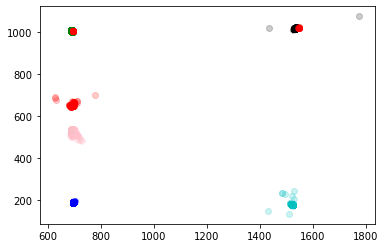

In [4]:
a=1790*7
b=1790*8
plt.scatter(df.box_tl["x"][a:b],df.box_tl["y"][a:b],c='b',alpha=0.2)
plt.scatter(df.box_tr["x"][a:b],df.box_tr["y"][a:b],c='c',alpha=0.2)
plt.scatter(df.box_bl["x"][a:b],df.box_bl["y"][a:b],c='g',alpha=0.2)
plt.scatter(df.box_br["x"][a:b],df.box_br["y"][a:b],c='k',alpha=0.2)
plt.scatter(df.opening_bottom["x"][a:b],df.opening_bottom["y"][a:b],c='r',alpha=0.2)
plt.scatter(df.opening_top["x"][a:b],df.opening_top["y"][a:b],c='pink',alpha=0.2)
plt.show()

## which rolling window is "good" at discarding random jumps in assignment but still capturing the slides?

In [5]:
N=3
x=df.box_tl["x"]
tst = 

SyntaxError: invalid syntax (Temp/ipykernel_12340/2133891871.py, line 3)

In [6]:
s = df.box_tl["x"]
type(s)

pandas.core.series.Series

In [459]:
?s.rolling

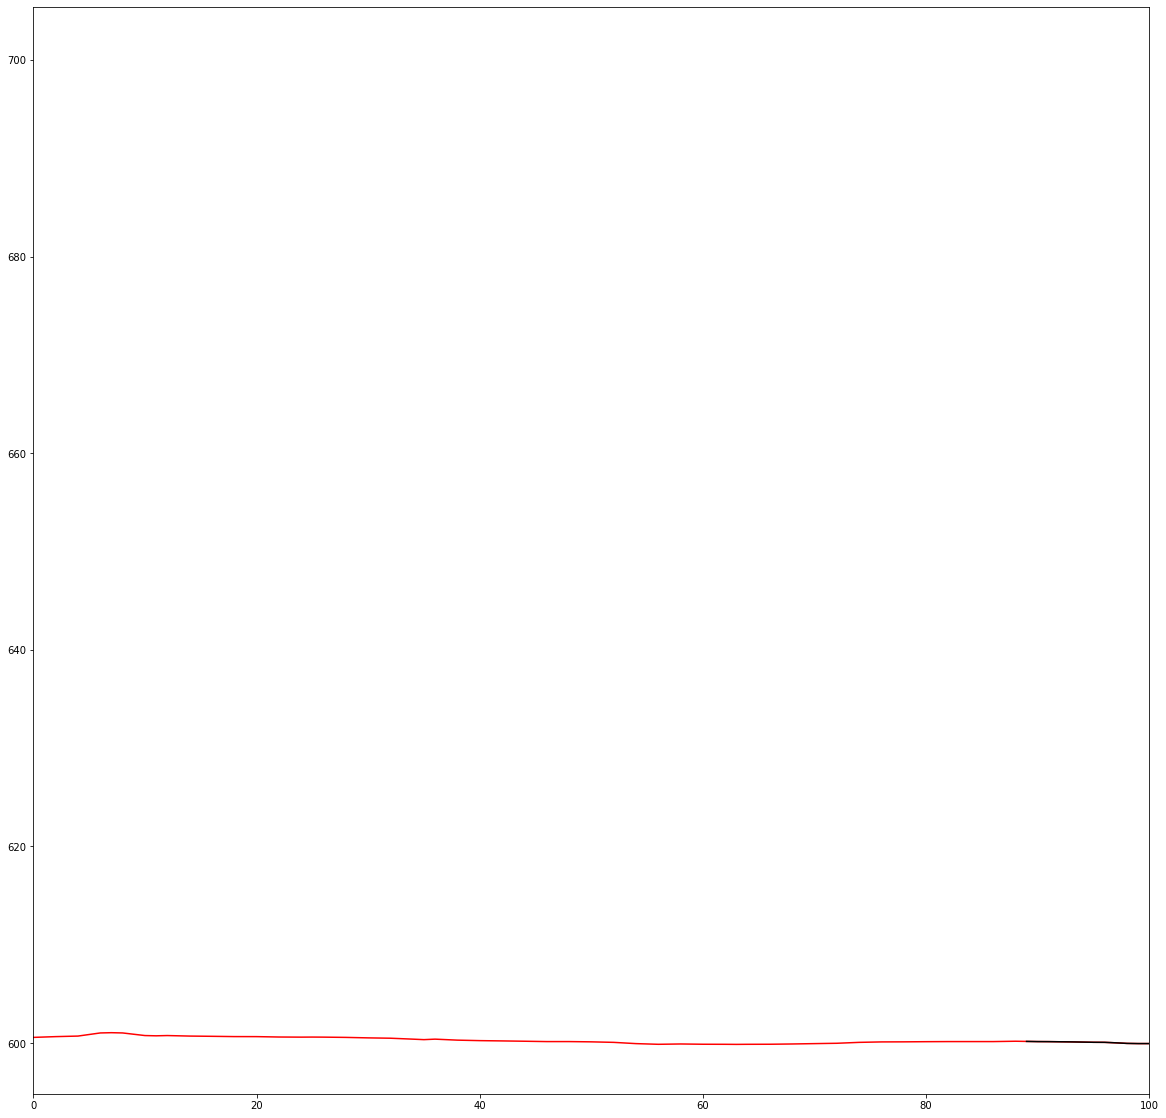

In [466]:
s = df.box_tl["x"]
seconds=3
fps=30
plt.figure(figsize=(20,20))
plt.plot(s.rolling(seconds*fps,min_periods=1).median(),c='r')
plt.plot(s.rolling(seconds*fps).median(),c='k')
plt.xlim((0,100))
plt.show()

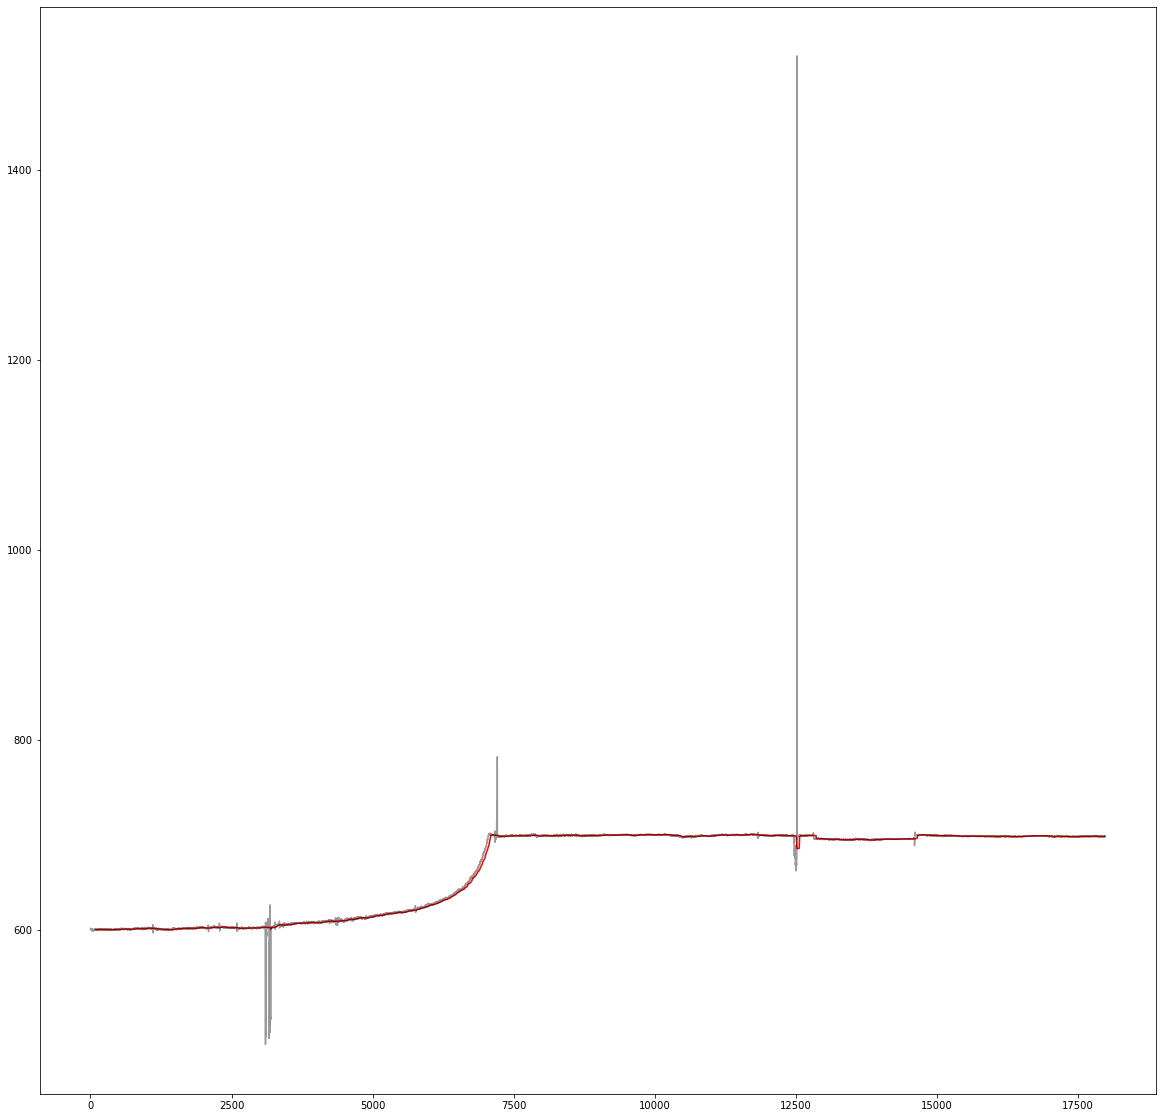

In [463]:
s = df.box_tl["x"]
seconds=3
fps=30
plt.figure(figsize=(20,20))
plt.plot(s.rolling(seconds*fps).median(),c='r')
plt.plot(s,c='k',alpha=0.4)
plt.show()

In [8]:
# what adjustments do we need for body parts?
part = df.tail_base
part

,x,y,likelihood
0,598.828674,493.486237,0.008742
1,598.874146,493.520447,0.008749
2,598.919128,493.559875,0.008887
3,599.036743,493.676971,0.009111
4,593.922119,493.186646,0.008729
...,...,...,...
17969,911.676392,393.177826,0.999731
17970,911.796021,393.423065,0.999720
17971,912.262878,392.658478,0.999845
17972,912.982849,390.989838,0.999910


In [21]:
cols = np.unique([colnm[0] for colnm in df.columns])

animal_cols = [col for col in cols if "box" not in col and "opening" not in col and "bodyparts" not in col]
animal_cols

['ear_left',
 'ear_right',
 'nose',
 'paw_left_back',
 'paw_left_front',
 'paw_right_back',
 'paw_right_front',
 'tail_base',
 'tail_tip']

In [30]:
?pd.concat

In [31]:
pd.concat([df['ear_left'],df['ear_right']],axis=1,keys=['ear_left','ear_right'])

ear_left                          ear_right                       
                 x           y likelihood           x           y likelihood
0      1404.881836  143.130737   0.002525  592.450623  970.094055   0.002159
1      1405.049194  143.248428   0.002450  593.026062  956.182922   0.002230
2      1404.996948  143.193680   0.002745  592.415039  970.179932   0.002445
3       599.924255  601.459656   0.002409  598.662292  605.515808   0.002694
4       599.903442  599.673889   0.002901  599.161438  603.959839   0.003094
...            ...         ...        ...         ...         ...        ...
17969   911.881653  326.702332   0.998492  923.272400  322.656128   0.998073
17970   904.747681  325.770142   0.997969  916.287170  319.467712   0.998280
17971   897.456238  325.813690   0.999250  906.792908  317.594482   0.996687
17972   888.149963  323.821075   0.998684  897.662659  314.606903   0.996483
17973   877.800537  320.783752   0.992851  886.336487  310.055450   0.998044

[17974 rows x 6 columns]

In [43]:
df.columns

MultiIndex([(      'bodyparts',     'coords'),
            (         'box_tl',          'x'),
            (         'box_tl',          'y'),
            (         'box_tl', 'likelihood'),
            (         'box_tr',          'x'),
            (         'box_tr',          'y'),
            (         'box_tr', 'likelihood'),
            (         'box_bl',          'x'),
            (         'box_bl',          'y'),
            (         'box_bl', 'likelihood'),
            (         'box_br',          'x'),
            (         'box_br',          'y'),
            (         'box_br', 'likelihood'),
            (    'opening_top',          'x'),
            (    'opening_top',          'y'),
            (    'opening_top', 'likelihood'),
            ( 'opening_bottom',          'x'),
            ( 'opening_bottom',          'y'),
            ( 'opening_bottom', 'likelihood'),
            (           'nose',          'x'),
            (           'nose',          'y'),
            (

In [499]:
cols = np.unique([col[0] for col in df.columns])
cols

array(['bodyparts', 'box_bl', 'box_br', 'box_tl', 'box_tr', 'ear_left',
       'ear_right', 'nose', 'opening_bottom', 'opening_top',
       'paw_left_back', 'paw_left_front', 'paw_right_back',
       'paw_right_front', 'tail_base', 'tail_tip'], dtype='<U15')

In [500]:
def reformat_df(df,likelihood_val,max_px_value,frame_limit_val,seconds,fps):
    new_df=pd.DataFrame()
    cols = np.unique([col[0] for col in df.columns])
    for col in cols:
        if "bodyparts" not in col:
            part = df[col]
            for idx in np.arange(0,len(part.x)):
                if part.likelihood[idx] < likelihood_val:
                    part.x[idx] = np.nan
                    part.y[idx] = np.nan
            if "box" not in col and "opening" not in col and "bodyparts" not in col:
                for idx in np.arange(0,len(part.x)):
                    second_idx = np.max([0,idx-1])
                    if abs(part.y[idx]-part.y[second_idx]) > max_px_value:
                        part.y[idx] = np.nan
                    elif abs(part.x[idx]-part.x[second_idx]) > max_px_value:
                        part.x[idx] = np.nan
                part.x = part.x.interpolate(limit=frame_limit_val)
                part.y = part.y.interpolate(limit=frame_limit_val)
                new_part = pd.concat({col:part},axis=1)
                if col == cols[1]:
                    new_df=new_part
                else:
                    new_df = pd.concat([new_df,new_part],axis=1)
            else:
                part.x = part.x.interpolate()
                part.x=part.x.rolling(seconds*fps,min_periods=1).median()
                part.y = part.y.interpolate()
                part.y=part.y.rolling(seconds*fps,min_periods=1).median()
                new_location = pd.concat({col:part},axis=1)
                new_df=pd.concat([new_df,new_location],axis=1)
            
    return new_df

In [501]:
new_df=reformat_df(df,0.9,1000,15,3,30)

C:\Users\dennise\AppData\Local\Temp/ipykernel_12340/2221142894.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part.x[idx] = np.nan
C:\Users\dennise\AppData\Local\Temp/ipykernel_12340/2221142894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part.y[idx] = np.nan
C:\Users\dennise\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [502]:
new_df

box_bl                               box_br               \
                x            y likelihood            x            y   
0      599.930908   963.720642   0.999816  1414.975220   962.655518   
1      600.101990   963.641968   0.999885  1415.067139   962.684021   
2      599.930908   963.563293   0.999852  1414.975220   962.655518   
3      599.848785   963.641968   0.999783  1415.067139   962.684021   
4      599.930908   963.613708   0.999855  1415.159058   962.712524   
...           ...          ...        ...          ...          ...   
17969  692.759766  1005.954803   0.999672  1531.512146  1018.393829   
17970  692.759766  1005.954803   0.999625  1531.512146  1018.393829   
17971  692.759766  1005.954803   0.999730  1531.512146  1018.385437   
17972  692.759766  1005.954803   0.999734  1531.512146  1018.385437   
17973  692.770569  1005.931671   0.999609  1531.512146  1018.385437   

                      box_tl                              box_tr  ...  \
      likelihood           x           y likelihood            x  ...   
0       0.999792  600.575623  141.166534   0.999926  1417.813110  ...   
1       0.999763  600.614746  141.452858   0.999920  1417.661743  ...   
2       0.999830  600.653870  141.739182   0.999900  1417.739380  ...   
3       0.999784  600.682068  141.801613   0.999923  1417.624878  ...   
4       0.999807  600.710266  141.864044   0.999883  1417.510376  ...   
...          ...         ...         ...        ...          ...  ...   
17969   0.997551  698.265045  189.274338   0.999886  1519.408508  ...   
17970   0.997794  698.271545  189.278542   0.999876  1519.408508  ...   
17971   0.998031  698.275543  189.281776   0.999853  1519.408508  ...   
17972   0.997953  698.275543  189.281776   0.999842  1519.403564  ...   
17973   0.998206  698.275543  189.281776   0.999882  1519.403564  ...   

      paw_right_back paw_right_front                  tail_base              \
          likelihood               x   y likelihood           x           y   
0           0.006150             NaN NaN   0.003026         NaN         NaN   
1           0.006930             NaN NaN   0.002901         NaN         NaN   
2           0.007855             NaN NaN   0.003280         NaN         NaN   
3           0.006398             NaN NaN   0.004063         NaN         NaN   
4           0.006106             NaN NaN   0.003776         NaN         NaN   
...              ...             ...  ..        ...         ...         ...   
17969       0.954382             NaN NaN   0.770925  911.676392  393.177826   
17970       0.952148             NaN NaN   0.808792  911.796021  393.423065   
17971       0.864063             NaN NaN   0.822342  912.262878  392.658478   
17972       0.463479             NaN NaN   0.740434  912.982849  390.989838   
17973       0.439683             NaN NaN   0.542728  914.530090  386.379028   

                    tail_tip                         
      likelihood           x           y likelihood  
0       0.008742         NaN         NaN   0.008444  
1       0.008749         NaN         NaN   0.010901  
2       0.008887         NaN         NaN   0.010367  
3       0.009111         NaN         NaN   0.014907  
4       0.008729         NaN         NaN   0.011806  
...          ...         ...         ...        ...  
17969   0.999731  821.305176  487.758423   0.997880  
17970   0.999720  821.612976  487.403870   0.998094  
17971   0.999845  821.693970  487.485687   0.997955  
17972   0.999910  822.745972  486.795990   0.997914  
17973   0.999966  826.346802  484.334503   0.998515  

[17974 rows x 45 columns]

In [503]:
#filename[:-4]+"_adj.csv"
new_df.to_csv(filename[:-4]+"_adj.csv")

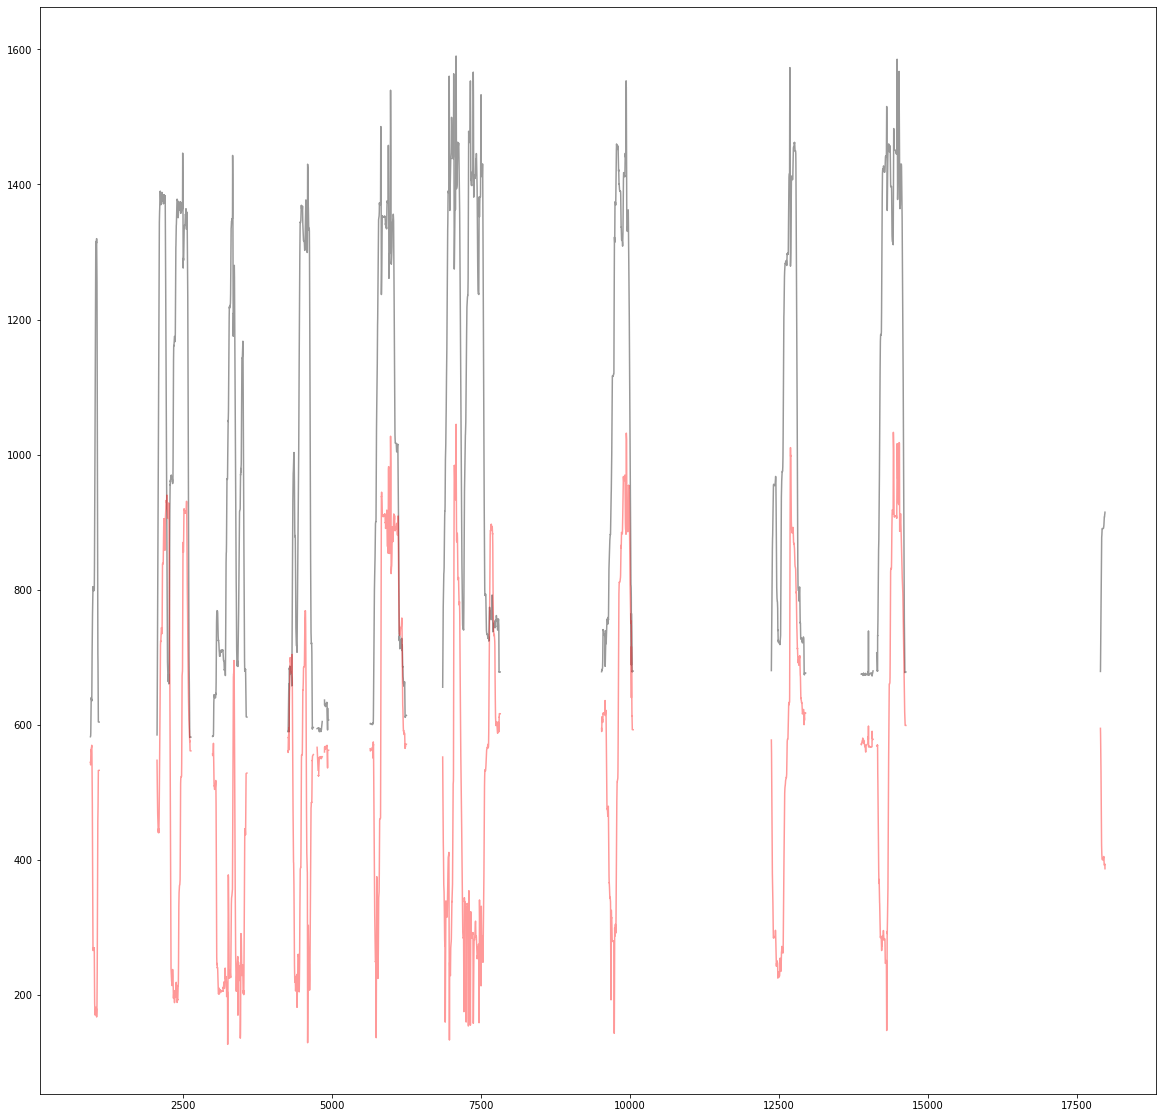

In [504]:
plt.figure(figsize=(20,20))
plt.plot(part.x,c='k',alpha=0.4)
plt.plot(part.y,c='r',alpha=.4)
plt.show()

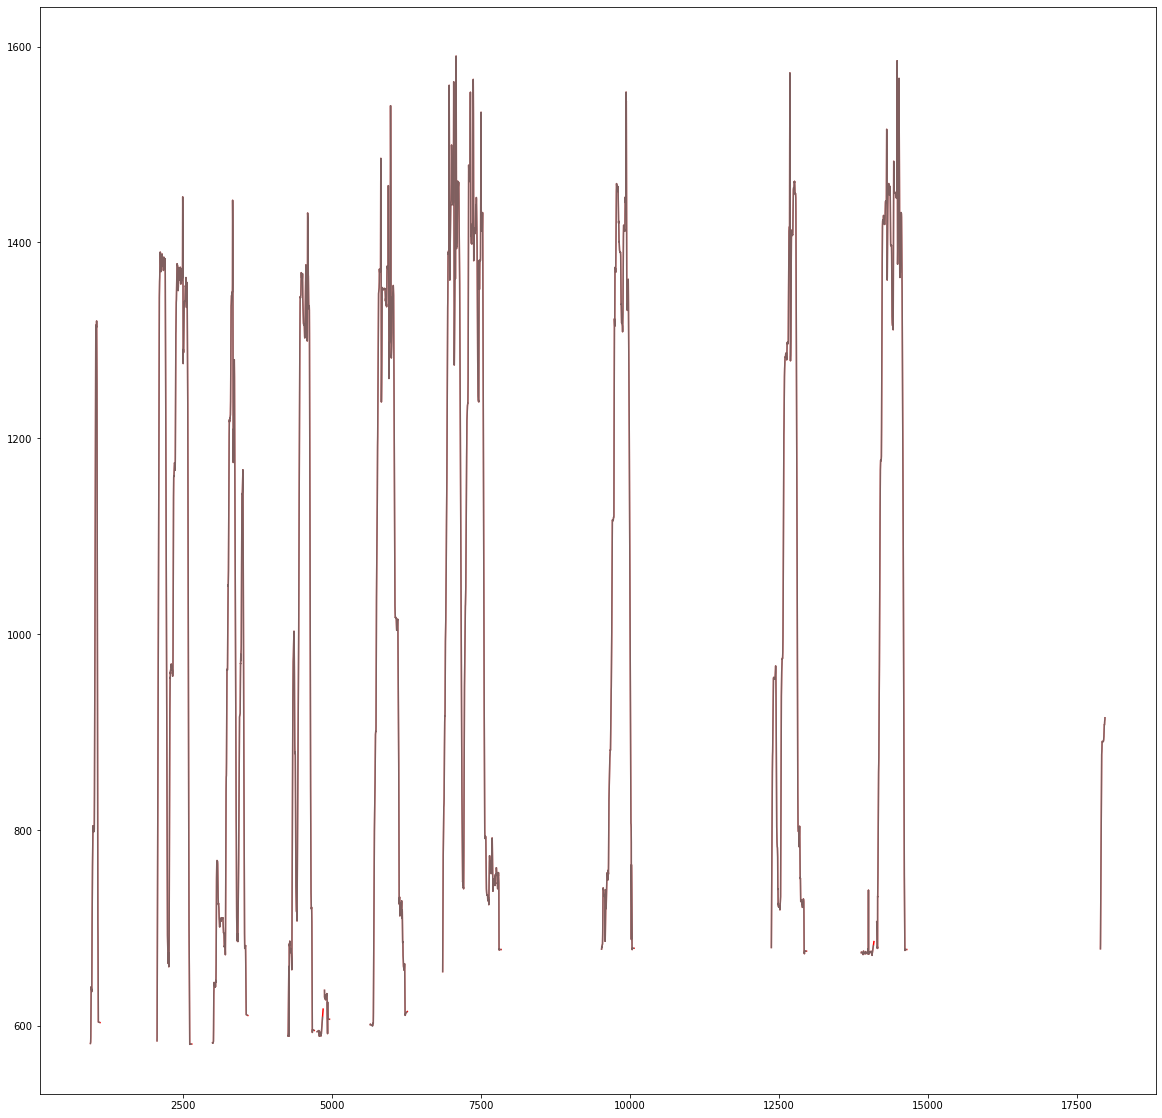

In [505]:
plt.figure(figsize=(20,20))
#plt.plot(part.y,c='k')
plt.plot(part.x.interpolate(limit=15),c='r',alpha=1)
plt.plot(part.x.interpolate(limit=5),c='c',alpha=0.5)
plt.show()

# preprocessing thoughts 

let's say for now,
- for corners, rolling median of 90 (frames, 3 sec)
- interpolating between nans limit = 15 (.5 sec)

### ~TODO~ Done:
1. first, apply the above lessons to an entire dataframe, save it
2. should make box, and find region (in px) that correspond to 5 cm from edge (of the 50x50cm box)
3. extract useful info
    a. how much time did the animal spend visible?
        i. just nose?
        ii. nose + ears?
        iii. nose + ears + tail base?
#### Remaining todos, described in another section
    b. describe (mathematically) a jump
    c. describe (mathematically) a rear

5538.0
5368.0
5281.0


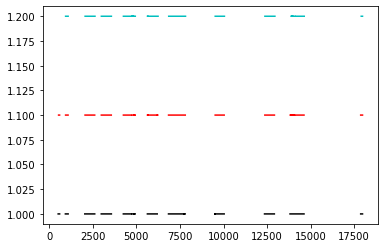

In [506]:
# how much time in the light/visible?
summary_df = pd.DataFrame({'nose':new_df.nose['x'],'ears':new_df.ear_left['x']+new_df.ear_right['x'],'tail_base':new_df.tail_base['x']})
summary_df[summary_df>0]=1
print(np.sum(summary_df.nose))
print(np.sum(summary_df.ears))
print(np.sum(summary_df.tail_base))
plt.plot(summary_df.nose,c='k')
plt.plot(summary_df.ears*1.1,c='r')
plt.plot(summary_df.tail_base*1.2,c='c')

In [507]:
# affine transform of points

In [508]:
import cv2

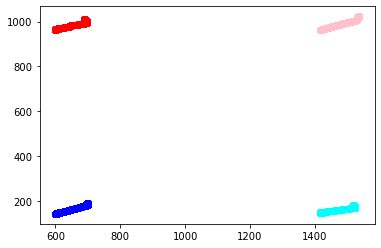

In [509]:
plt.scatter(new_df.box_bl['x'],new_df.box_bl['y'],c='r') #0,500mm
plt.scatter(new_df.box_br['x'],new_df.box_br['y'],c='pink') #500,500mm
plt.scatter(new_df.box_tl['x'],new_df.box_tl['y'],c='b') #0,0mm
plt.scatter(new_df.box_tr['x'],new_df.box_tr['y'],c='cyan') #500,0mm

In [510]:
s1=[0,500]
s2=[500,500]
s3=[0,0]
s4=[500,0]
p1=[new_df.box_bl.x[idx],new_df.box_bl.y[idx]] #0,500
p2=[new_df.box_br.x[idx],new_df.box_br.y[idx]] #500,500
p3=[new_df.box_tl.x[idx],new_df.box_tl.y[idx]] #0,0
p4=[new_df.box_tr.x[idx],new_df.box_tr.y[idx]] #500,0
print(p1,p2,p3,p4)
print(s1,s2,s3,s4)

[601.0762634277344, 965.1229858398438] [1416.7677612304688, 962.7210388183594] [601.4052429199219, 142.02486419677734] [1416.6018676757812, 147.32157135009766]
[0, 500] [500, 500] [0, 0] [500, 0]


In [511]:
new_df.box_bl.x

0        599.930908
1        600.101990
2        599.930908
3        599.848785
4        599.930908
            ...    
17969    692.759766
17970    692.759766
17971    692.759766
17972    692.759766
17973    692.770569
Name: x, Length: 17974, dtype: float64

In [512]:
# get a transform matrix
A2 = cv2.getPerspectiveTransform(np.float32([p1,p2,p3,p4]),np.float32([s1,s2,s3,s4]))

# set points
pts = np.array([[p1]],dtype='float32')

# use transform matrix to un-warp the points
cv2.perspectiveTransform(pts,A2)

array([[[  0., 500.]]], dtype=float32)

In [513]:
tst_df=pd.DataFrame()
pd.concat([tst_df,new_df[new_df.index==1000]],axis=0)

box_bl                              box_br                         \
               x           y likelihood            x           y likelihood   
1000  601.076263  965.122986   0.999842  1416.767761  962.721039   0.999149   

          box_tl                              box_tr  ... paw_right_back  \
               x           y likelihood            x  ...     likelihood   
1000  601.405243  142.024864   0.999816  1416.601868  ...       0.999749   

     paw_right_front                  tail_base                         \
                   x   y likelihood           x           y likelihood   
1000             NaN NaN   0.178941  798.785034  269.035309   0.999734   

       tail_tip                         
              x           y likelihood  
1000  779.17157  398.094574   0.997579  

[1 rows x 45 columns]

In [514]:
idx=1000
data = new_df[new_df.index==idx]

In [515]:
sub_df = test_df[test_df.index==1000].copy()
sub_df.iloc[0,1]
sub_df.iloc[0,0:2]

box_bl  x      0.000000
        y    965.122986
Name: 1000, dtype: float64

In [516]:
np.arange(0,len(sub_df.columns),3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42])

In [517]:
i=12
p1_0=sub_df.iloc[0,i]
p1_1=sub_df.iloc[0,i+1]
# set points
pts = np.array([[[p1_0,p1_1]]],dtype='float32')
# use transform matrix to un-warp the points
[p1_0_new,p1_1_new]=cv2.perspectiveTransform(pts,A2)[0][0]

In [543]:
def align_df(df):
    new_df=pd.DataFrame()
    # for each index, get the box coords, find transformation matrix, then apply it to all other points
    s1=[0,500]
    s2=[500,500]
    s3=[0,0]
    s4=[500,0]
    for idx in np.arange(0,len(df)):
        if idx%1000==0:
            print('at {} of {} rows'.format(idx,len(df)))
        # get box points
        p1=[df.box_bl.x[idx],df.box_bl.y[idx]] #0,500
        p2=[df.box_br.x[idx],df.box_br.y[idx]] #500,500
        p3=[df.box_tl.x[idx],df.box_tl.y[idx]] #0,0
        p4=[df.box_tr.x[idx],df.box_tr.y[idx]] #500,0
        # get transform matrix
        M = cv2.getPerspectiveTransform(np.float32([p1,p2,p3,p4]),np.float32([s1,s2,s3,s4]))
        # apply transform matrix to other points
        sub_df=df[df.index==idx].copy()
        for i in np.arange(0,len(sub_df.columns),3):
            p1_0=sub_df.iloc[0,i]
            p1_1=sub_df.iloc[0,i+1]
            if np.isnan(p1_0):
                p1_0_new=np.nan
                p1_1_new=np.nan
            else:
                # set points
                pts = np.array([[[p1_0,p1_1]]],dtype='float32')
                # use transform matrix to un-warp the points
                [p1_0_new,p1_1_new]=cv2.perspectiveTransform(pts,M)[0][0]
            sub_df.iloc[0,i]=p1_0_new
            sub_df.iloc[0,i+1]=p1_1_new
        new_df=pd.concat([new_df,sub_df],axis=0)
    return new_df

In [544]:
aligned_df=align_df(new_df)

at 0 of 17974 rows
at 1000 of 17974 rows
at 2000 of 17974 rows
at 3000 of 17974 rows
at 4000 of 17974 rows
at 5000 of 17974 rows
at 6000 of 17974 rows
at 7000 of 17974 rows
at 8000 of 17974 rows
at 9000 of 17974 rows
at 10000 of 17974 rows
at 11000 of 17974 rows
at 12000 of 17974 rows
at 13000 of 17974 rows
at 14000 of 17974 rows
at 15000 of 17974 rows
at 16000 of 17974 rows
at 17000 of 17974 rows


In [545]:
aligned_df

box_bl                   box_br                          box_tl  \
                  x      y likelihood      x      y likelihood             x   
0      0.000000e+00  500.0   0.999816  500.0  500.0   0.999792  0.000000e+00   
1     -5.729734e-14  500.0   0.999885  500.0  500.0   0.999763 -1.143002e-13   
2      0.000000e+00  500.0   0.999852  500.0  500.0   0.999830  0.000000e+00   
3      1.145059e-13  500.0   0.999783  500.0  500.0   0.999784  5.713096e-14   
4      0.000000e+00  500.0   0.999855  500.0  500.0   0.999807  0.000000e+00   
...             ...    ...        ...    ...    ...        ...           ...   
17969 -5.403376e-14  500.0   0.999672  500.0  500.0   0.997551 -5.516992e-14   
17970  0.000000e+00  500.0   0.999625  500.0  500.0   0.997794  5.516917e-14   
17971  0.000000e+00  500.0   0.999730  500.0  500.0   0.998031  0.000000e+00   
17972 -5.403126e-14  500.0   0.999734  500.0  500.0   0.997953 -1.103367e-13   
17973 -1.080616e-13  500.0   0.999609  500.0  500.0   0.998206 -5.516715e-14   

                               box_tr  ... paw_right_back paw_right_front      \
                  y likelihood      x  ...     likelihood               x   y   
0      0.000000e+00   0.999926  500.0  ...       0.006150             NaN NaN   
1     -1.428753e-14   0.999920  500.0  ...       0.006930             NaN NaN   
2      0.000000e+00   0.999900  500.0  ...       0.007855             NaN NaN   
3      0.000000e+00   0.999923  500.0  ...       0.006398             NaN NaN   
4     -2.856428e-14   0.999883  500.0  ...       0.006106             NaN NaN   
...             ...        ...    ...  ...            ...             ...  ..   
17969 -2.758496e-14   0.999886  500.0  ...       0.954382             NaN NaN   
17970  2.758459e-14   0.999876  500.0  ...       0.952148             NaN NaN   
17971  0.000000e+00   0.999853  500.0  ...       0.864063             NaN NaN   
17972  0.000000e+00   0.999842  500.0  ...       0.463479             NaN NaN   
17973  0.000000e+00   0.999882  500.0  ...       0.439683             NaN NaN   

                   tail_base                          tail_tip              \
      likelihood           x           y likelihood          x           y   
0       0.003026         NaN         NaN   0.008742        NaN         NaN   
1       0.002901         NaN         NaN   0.008749        NaN         NaN   
2       0.003280         NaN         NaN   0.008887        NaN         NaN   
3       0.004063         NaN         NaN   0.009111        NaN         NaN   
4       0.003776         NaN         NaN   0.008729        NaN         NaN   
...          ...         ...         ...        ...        ...         ...   
17969   0.770925  132.831345  127.650230   0.999731  77.391556  185.406204   
17970   0.808792  132.903900  127.801262   0.999720  77.579048  185.189346   
17971   0.822342  133.188080  127.333473   0.999845  77.627510  185.239487   
17972   0.740434  133.631027  126.314018   0.999910  78.275642  184.820312   
17973   0.542728  134.578949  123.490120   0.999966  80.488739  183.321564   

                  
      likelihood  
0       0.008444  
1       0.010901  
2       0.010367  
3       0.014907  
4       0.011806  
...          ...  
17969   0.997880  
17970   0.998094  
17971   0.997955  
17972   0.997914  
17973   0.998515  

[17974 rows x 45 columns]

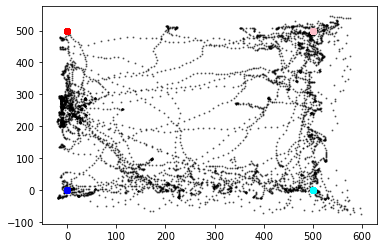

In [546]:
plt.scatter(aligned_df.nose['x'],aligned_df.nose['y'],c='k',s=1,alpha=0.5)
plt.scatter(aligned_df.box_bl['x'],aligned_df.box_bl['y'],c='r')
plt.scatter(aligned_df.box_br['x'],aligned_df.box_br['y'],c='pink')
plt.scatter(aligned_df.box_tl['x'],aligned_df.box_tl['y'],c='b')
plt.scatter(aligned_df.box_tr['x'],aligned_df.box_tr['y'],c='cyan')
plt.show()

In [552]:
nose = aligned_df.nose
nose

,x,y,likelihood
0,NaN,NaN,0.006743
1,NaN,NaN,0.007441
2,NaN,NaN,0.006668
3,NaN,NaN,0.007078
4,NaN,NaN,0.007489
...,...,...,...
17969,125.928238,71.330910,0.993589
17970,119.967926,70.642426,0.990155
17971,113.646042,69.631088,0.997681
17972,106.418175,69.043922,0.998823


In [556]:
~np.isnan(aligned_df.nose['x'])

0        False
1        False
2        False
3        False
4        False
         ...  
17969     True
17970     True
17971     True
17972     True
17973     True
Name: x, Length: 17974, dtype: bool

In [647]:
# how much time did the animal spend in the box?
nose_vals = ~np.isnan(aligned_df.nose['x'])
ear_l_vals = ~np.isnan(aligned_df.ear_left['x'])
ear_r_vals = ~np.isnan(aligned_df.ear_right['x'])
tail_vals = ~np.isnan(aligned_df.tail_base['x'])

print("frames with nose: {}".format(np.sum(nose_vals)))
frames_with_nose = np.sum(nose_vals)
print("frames with nose and ears: {}".format(np.sum(nose_vals*ear_l_vals*ear_r_vals)))
print("frames with nose and ears and tail: {}".format(np.sum(nose_vals*ear_l_vals*ear_r_vals*tail_vals)))

frames with nose: 5538
frames with nose and ears: 5314
frames with nose and ears and tail: 5044


In [649]:
# how much time did it spend within 50mm of the 500mm^2 walls?
# can just use adj px values > 450 and < 50 (further vals are outside walls, but include jumps and rears which we do want to include)
nose_df['within50mm']=0
for idx in nose_df.index:
    xval=nose_df.x[idx]
    yval=nose_df.y[idx]
    if xval < 50 or xval > 450 or yval < 50 or yval > 450:
        nose_df.iloc[idx,3]=1
summed_val=np.sum(nose_df.within50mm)
print("frames with nose within 50mm of edge {}".format(summed_val))
print("fraction of frames where animal is inside the box AND within 50mm of an edge {}".format(summed_val/frames_with_nose))
print("fraction of frames where animal is inside and in the center (further than 50mm from an edge): {}".format((frames_with_nose-summed_val)/frames_with_nose))

C:\Users\dennise\AppData\Local\Temp/ipykernel_12340/4266349688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nose_df['within50mm']=0
C:\Users\dennise\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


frames with nose within 50mm of edge 4500
fraction of frames where animal is inside the box AND within 50mm of an edge 0.8125677139761647
fraction of frames where animal is inside and in the center (further than 50mm from an edge): 0.18743228602383533


In [ ]:
# plot points in adjusted space

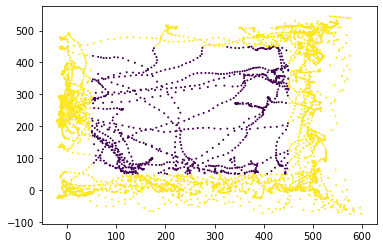

In [643]:
plt.scatter(nose_df.x,nose_df.y,c=nose_df.within50mm,s=1)

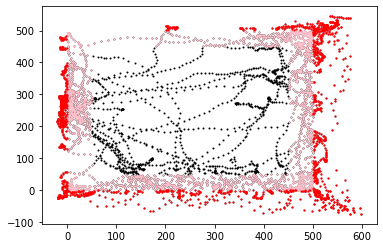

In [613]:
plt.scatter(nose_df.x,nose_df.y,s=1,c='k')
plt.scatter(nose_df.x[nose_df.x<50],nose_df.y[nose_df.x<50],c='pink',s=1)

plt.scatter(nose_df.x[nose_df.x>450],nose_df.y[nose_df.x>450],c='pink',s=1)

plt.scatter(nose_df.x[nose_df.y<50],nose_df.y[nose_df.y<50],c='pink',s=1)
plt.scatter(nose_df.x[nose_df.y>450],nose_df.y[nose_df.y>450],c='pink',s=1)

plt.scatter(nose_df.x[nose_df.x<0],nose_df.y[nose_df.x<0],c='r',s=1)
plt.scatter(nose_df.x[nose_df.x>500],nose_df.y[nose_df.x>500],c='r',s=1)
plt.scatter(nose_df.x[nose_df.y<0],nose_df.y[nose_df.y<0],c='r',s=1)
plt.scatter(nose_df.x[nose_df.y>500],nose_df.y[nose_df.y>500],c='r',s=1)

# NEXT TO DO
### jump and rear classifications

In [106]:
# know that 2:22 animal enters, there's a jump at ~2:27, 2:33, then exit 2:35, reenter
# so let's grab a subset around this time
start=round(((2*60)+22)*29.9)
end= start + round(29.9*13)

In [38]:
df_sub = df[start:end]
df_sub

bodyparts      box_tl                              box_tr              \
        coords           x           y likelihood            x           y   
4246      4246  610.216431  145.595718   0.999981  1426.649658  149.234283   
4247      4247  610.124390  145.322037   0.999981  1426.523193  149.413635   
4248      4248  610.096985  145.190140   0.999982  1426.444336  148.665009   
4249      4249  610.191956  145.259537   0.999985  1426.637573  149.360626   
4250      4250  610.020569  145.302185   0.999984  1426.453125  149.246216   
...        ...         ...         ...        ...          ...         ...   
4630      4630  610.135559  145.730942   0.999981  1428.888550  149.759186   
4631      4631  610.820190  146.188568   0.999988  1429.044312  149.638718   
4632      4632  609.467041  145.290817   0.999981  1428.584961  149.577499   
4633      4633  609.051941  145.309555   0.999975  1428.870605  149.595703   
4634      4634  609.655273  145.445190   0.999977  1429.179688  150.013992   

                     box_bl                         ... paw_left_front  \
     likelihood           x           y likelihood  ...     likelihood   
4246   0.999991  609.665649  967.411072   0.999730  ...       0.003389   
4247   0.999992  609.704041  968.166138   0.999649  ...       0.002549   
4248   0.999991  609.348450  966.920532   0.999791  ...       0.003267   
4249   0.999992  609.929749  967.986084   0.999698  ...       0.002712   
4250   0.999992  609.729614  968.034546   0.999652  ...       0.003128   
...         ...         ...         ...        ...  ...            ...   
4630   0.999994  609.063782  968.864197   0.999481  ...       0.108929   
4631   0.999994  610.543884  968.965698   0.999772  ...       0.075764   
4632   0.999993  610.611145  968.671875   0.999598  ...       0.189294   
4633   0.999994  609.354431  967.783203   0.999615  ...       0.092593   
4634   0.999993  609.663818  967.982544   0.999692  ...       0.185309   

     paw_right_front                        paw_left_back              \
                   x           y likelihood             x           y   
4246     1431.553101  957.874023   0.003531    604.736023  494.404022   
4247      615.841248  497.267944   0.002726    604.689575  494.450592   
4248     1431.459229  957.424133   0.003648    604.527954  494.462891   
4249      615.775696  497.412659   0.003582    606.873291  495.597656   
4250      615.849121  497.270996   0.004418    607.254517  495.430969   
...              ...         ...        ...           ...         ...   
4630     1045.405884  258.999268   0.956542    954.089600  318.124115   
4631     1018.691101  278.134583   0.977679   1000.872681  284.414612   
4632      997.855835  290.957031   0.988147    976.690674  299.037140   
4633      970.690308  308.686737   0.910735    875.990417  368.584229   
4634      940.805054  323.089417   0.921479    923.837952  330.143188   

                paw_right_back                         
     likelihood              x           y likelihood  
4246   0.008194     612.017212  609.927246   0.007378  
4247   0.008802     612.072998  609.812927   0.007191  
4248   0.008657     611.940369  609.941528   0.006400  
4249   0.010329     612.169006  609.882996   0.007293  
4250   0.010642     616.649597  492.181458   0.008306  
...         ...            ...         ...        ...  
4630   0.043935    1055.249023  255.210358   0.168778  
4631   0.243540    1007.651794  328.683441   0.591629  
4632   0.180363     992.208435  290.964600   0.272337  
4633   0.110227     979.121399  302.934326   0.215743  
4634   0.191556     948.685791  319.167450   0.213996  

[389 rows x 46 columns]

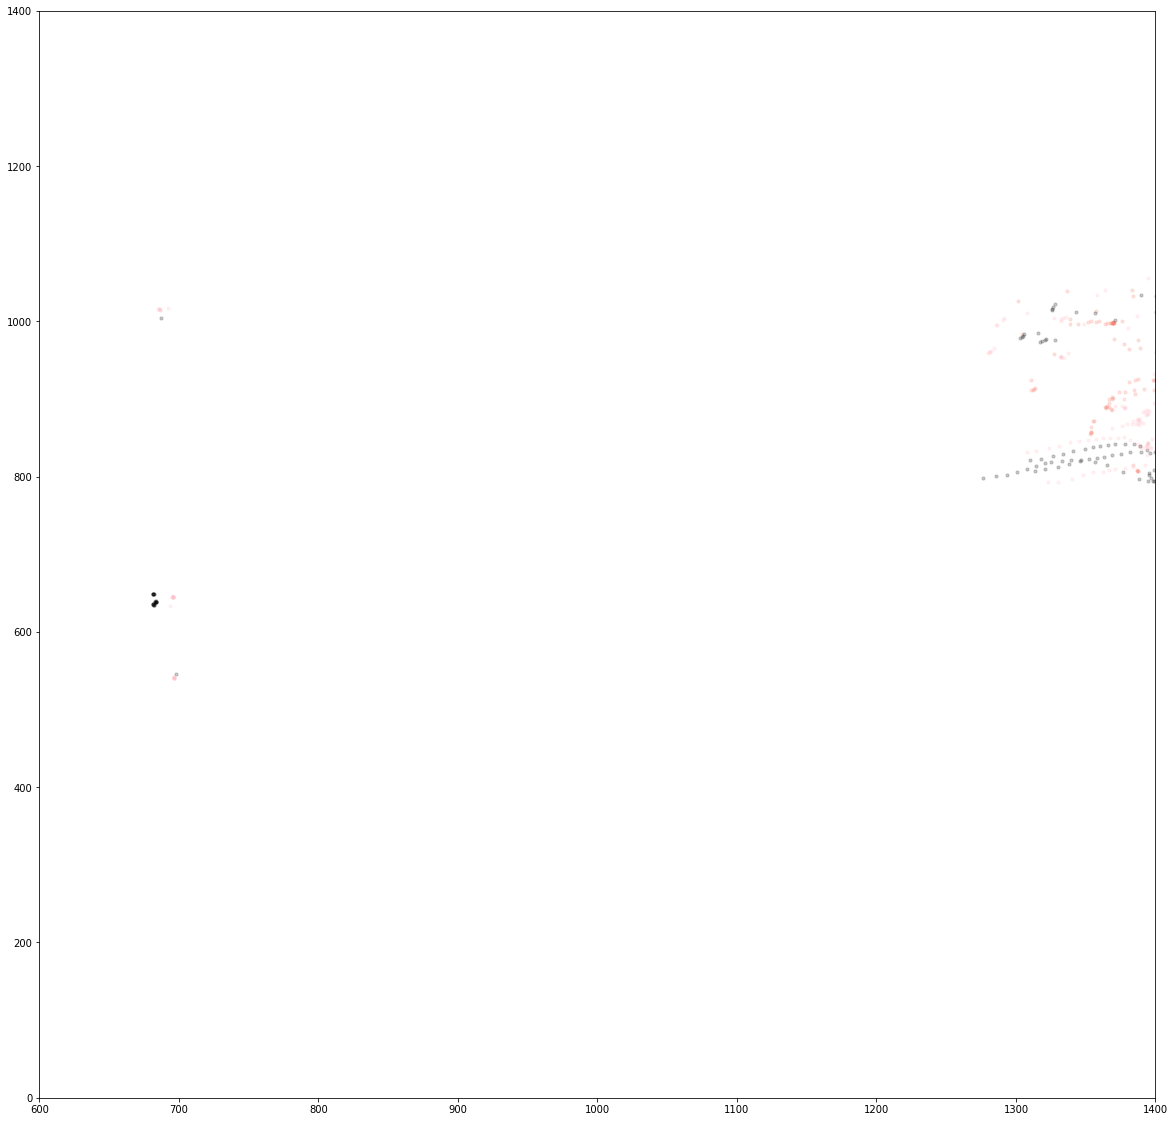

In [91]:
a=.2
sz=10
df_sub = jumps.copy()
plt.figure(figsize=(20,20))
plt.scatter(df_sub.tail_base["x"],df_sub.tail_base["y"],c='salmon',alpha=a,s=sz)
plt.scatter(df_sub.tail_tip["x"],df_sub.tail_tip["y"],c='salmon',alpha=a,s=sz)
plt.scatter(df_sub.ear_left["x"],df_sub.ear_left["y"],c='k',alpha=a,s=sz)
plt.scatter(df_sub.ear_right["x"],df_sub.ear_right["y"],c='k',alpha=a,s=sz)
plt.scatter(df_sub.nose["x"],df_sub.nose["y"],c='k',alpha=a,s=sz)

plt.scatter(df_sub.paw_left_back["x"],df_sub.paw_left_back["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_left_front["x"],df_sub.paw_left_front["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_right_back["x"],df_sub.paw_right_back["y"],c='pink',alpha=a,s=sz)
plt.scatter(df_sub.paw_right_front["x"],df_sub.paw_right_front["y"],c='pink',alpha=a,s=sz)
plt.xlim(600,1400)
plt.ylim(0,1400)
plt.show()

In [90]:
#7:41 enter
# 7:48 rearing off and on till 7:53
# jumps 758, 802 804 805  
# 809 out

start = round(((60*7)+41)*29.9)
end = round(start+(29*29.9))
df_r = df[start:end]
df_r
rear = df_r[(30*7):(30*12)]
jumps = df_r[(30*21):(30*26)]

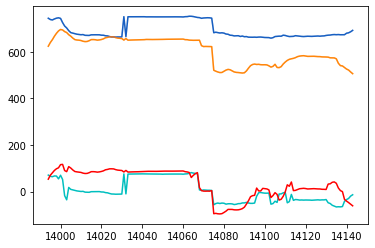

In [137]:
x1=rear['nose','x'][rear.nose["likelihood"]>0.05]
y1=rear['nose','y'][rear.nose["likelihood"]>0.05]
x2=rear['tail_base','x'][rear.nose["likelihood"]>0.05]
y2=rear['tail_base','y'][rear.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(rear['nose','x'],c='b',alpha=0.2)
plt.plot(rear['nose','y'],c='orange',alpha=0.2)
plt.plot((x1-x2),'c')
plt.plot((y1-y2),'r')
#plt.ylim(-100,800)
#plt.xlim(14420,14500)
plt.show()

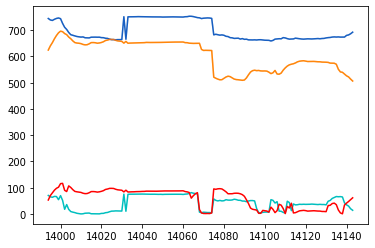

In [138]:
x1=rear['nose','x'][rear.nose["likelihood"]>0.05]
y1=rear['nose','y'][rear.nose["likelihood"]>0.05]
x2=rear['tail_base','x'][rear.nose["likelihood"]>0.05]
y2=rear['tail_base','y'][rear.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(rear['nose','x'],c='b',alpha=0.2)
plt.plot(rear['nose','y'],c='orange',alpha=0.2)
plt.plot(abs(x1-x2),'c')
plt.plot(abs(y1-y2),'r')
#plt.ylim(-100,800)
#plt.xlim(14420,14500)
plt.show()

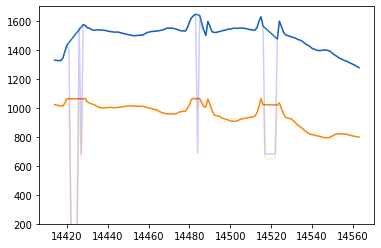

In [110]:
plt.plot(jumps['nose','x'][jumps.nose["likelihood"]>0.05])
plt.plot(jumps['nose','y'][jumps.nose["likelihood"]>0.05])
plt.plot(jumps['nose','x'],c='b',alpha=0.2)
plt.plot(jumps['nose','y'],c='orange',alpha=0.2)
plt.ylim(200,1700)
plt.show()

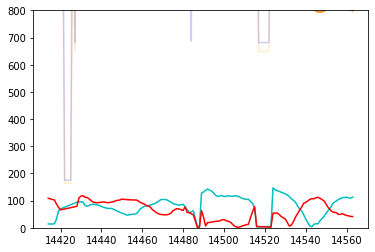

In [139]:
x1=jumps['nose','x'][jumps.nose["likelihood"]>0.05]
y1=jumps['nose','y'][jumps.nose["likelihood"]>0.05]
x2=jumps['tail_base','x'][jumps.nose["likelihood"]>0.05]
y2=jumps['tail_base','y'][jumps.nose["likelihood"]>0.05]

plt.plot(x1)
plt.plot(y1)
plt.plot(jumps['nose','x'],c='b',alpha=0.2)
plt.plot(jumps['nose','y'],c='orange',alpha=0.2)
plt.plot(abs(x1-x2),'c')
plt.plot(abs(y1-y2),'r')
plt.ylim(-0,800)
#plt.xlim(14420,14500)
plt.show()

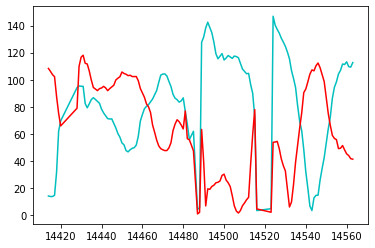

In [93]:
jumps

bodyparts      box_tl                              box_tr              \
         coords           x           y likelihood            x           y   
14414     14414  695.812317  187.108459   0.999945  1523.466431  173.947571   
14415     14415  695.813293  187.139450   0.999943  1523.158081  173.928833   
14416     14416  695.647827  187.032120   0.999944  1522.795166  174.014771   
14417     14417  695.657043  187.013351   0.999944  1522.770874  174.035934   
14418     14418  695.564514  186.936691   0.999945  1522.789551  174.033386   
...         ...         ...         ...        ...          ...         ...   
14559     14559  695.569641  187.144638   0.999949  1521.431519  173.162766   
14560     14560  695.564392  187.129623   0.999951  1521.452026  173.227951   
14561     14561  695.554688  187.108871   0.999950  1521.297729  173.179871   
14562     14562  695.585327  187.044632   0.999955  1521.245728  173.186676   
14563     14563  695.541809  187.042343   0.999954  1521.283325  173.226257   

                      box_bl                          ... paw_left_front  \
      likelihood           x            y likelihood  ...     likelihood   
14414   0.999809  689.237976  1008.845276   0.999748  ...       0.957100   
14415   0.999829  689.258789  1008.972168   0.999708  ...       0.942132   
14416   0.999848  688.534363  1009.246765   0.999754  ...       0.962431   
14417   0.999856  688.499023  1009.652466   0.999746  ...       0.972180   
14418   0.999845  688.775085  1009.687866   0.999811  ...       0.954160   
...          ...         ...          ...        ...  ...            ...   
14559   0.999884  688.262207  1009.232300   0.999794  ...       0.060139   
14560   0.999888  688.335571  1009.160889   0.999782  ...       0.059998   
14561   0.999892  688.401489  1009.398376   0.999785  ...       0.078919   
14562   0.999885  688.422791  1009.202515   0.999715  ...       0.098728   
14563   0.999889  688.263062  1009.921631   0.999708  ...       0.071087   

      paw_right_front                         paw_left_back              \
                    x            y likelihood             x           y   
14414     1291.642700  1004.288330   0.439628   1332.232544  955.016052   
14415     1291.051147  1002.178162   0.595703   1331.978271  954.518921   
14416     1286.415771   995.136841   0.420695   1332.184692  954.141418   
14417     1285.972656   995.612000   0.605019   1331.896851  953.417969   
14418     1307.567505  1010.263977   0.668995   1334.335938  953.012268   
...               ...          ...        ...           ...         ...   
14559     1355.019653   806.219360   0.079417   1386.585449  873.007751   
14560     1348.211670   801.654785   0.061233   1384.107910  871.566162   
14561     1340.358398   797.478271   0.059882   1405.585571  843.738708   
14562     1330.441650   793.078613   0.071812   1368.820435  862.733215   
14563     1323.226196   792.456360   0.137728   1389.134766  838.082764   

                 paw_right_back                         
      likelihood              x           y likelihood  
14414   0.972809    1282.006104  961.062012   0.993330  
14415   0.965880    1281.311157  960.630737   0.989978  
14416   0.962669    1280.643555  959.996643   0.983213  
14417   0.967591    1279.761230  959.313171   0.974487  
14418   0.821046    1284.409302  965.228699   0.976006  
...          ...            ...         ...        ...  
14559   0.316435    1422.543335  834.873413   0.062043  
14560   0.071648    1406.489868  880.588867   0.081789  
14561   0.015361    1408.885742  835.659729   0.049747  
14562   0.026449    1401.225098  827.756470   0.029573  
14563   0.025631    1393.901001  828.264587   0.021878  

[150 rows x 46 columns]